In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv('kc_house_data.csv')

# Display the data types of each column
data.dtypes


,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [9]:
# Drop the columns 'id' and 'Unnamed: 0'
if 'id' in data.columns:
  data.drop(["id"], axis=1, inplace=True)
if 'Unnamed: 0' in data.columns:
  data.drop(["Unnamed: 0"], axis=1, inplace=True)

# Display the statistical summary of the data
data.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
# Count the number of houses with unique floor values
floor_counts = data['floors'].value_counts().to_frame()

# Display the result
floor_counts


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


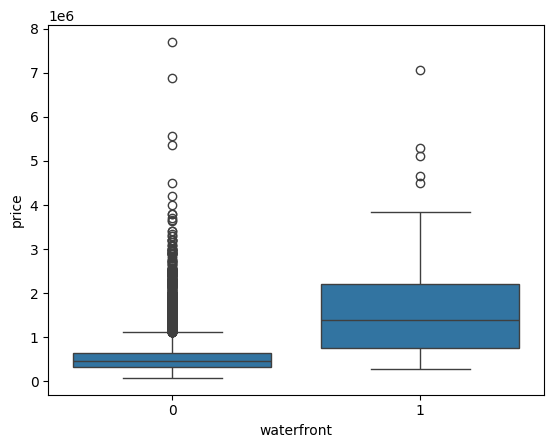

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to check the price outliers for houses with and without a waterfront view
sns.boxplot(x='waterfront', y='price', data=data)

# Display the plot
plt.show()


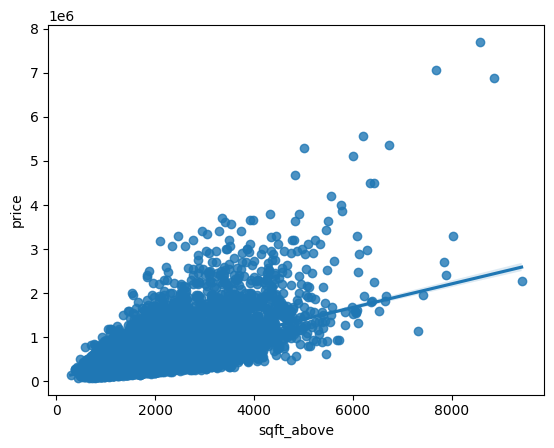

In [13]:
# Create a regression plot to check the correlation between 'sqft_above' and 'price'
sns.regplot(x='sqft_above', y='price', data=data)

# Display the plot
plt.show()


In [14]:
from sklearn.linear_model import LinearRegression

# Prepare the feature and target variables
X = data[['sqft_living']]  # Features
y = data['price']  # Target

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate R²
r_squared = model.score(X, y)

# Display the R² value
print("R² value:", r_squared)


R² value: 0.4928532179037931


In [15]:
# List of features to be used
features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

# Prepare the feature and target variables
X_multiple = data[features]
y = data['price']

# Initialize and fit the model
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

# Calculate R²
r_squared_multiple = model_multiple.score(X_multiple, y)

# Display the R² value
print("R² value for multiple features:", r_squared_multiple)


R² value for multiple features: 0.6577151058279325


In [16]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling, polynomial transformation, and linear regression
pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())

# Fit the pipeline with the features and target
pipeline.fit(X_multiple, y)

# Calculate R²
r_squared_pipeline = pipeline.score(X_multiple, y)

# Display the R² value
print("R² value with pipeline:", r_squared_pipeline)


R² value with pipeline: 0.7513467656307783


In [17]:
from sklearn.linear_model import Ridge

# Initialize Ridge regression model
ridge_model = Ridge(alpha=0.1)

# Fit the Ridge model with the features and target
ridge_model.fit(X_multiple, y)

# Calculate R²
r_squared_ridge = ridge_model.score(X_multiple, y)

# Display the R² value
print("R² value for Ridge regression:", r_squared_ridge)


R² value for Ridge regression: 0.6577150926380141


In [18]:
# Apply polynomial features transformation (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_multiple)

# Fit Ridge regression with transformed data
ridge_model_poly = Ridge(alpha=0.1)
ridge_model_poly.fit(X_poly, y)

# Calculate R² with transformed data
r_squared_ridge_poly = ridge_model_poly.score(X_poly, y)

# Display the R² value
print("R² value for Ridge regression with polynomial features:", r_squared_ridge_poly)


R² value for Ridge regression with polynomial features: 0.7393765330236564
